# Importing libraries and dataset

In [57]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Basic data exploration
The y_train and y_test sginify what type of clothing is on the images in X_train and X_test, numbers in those columns represent:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
print(y_train.shape)

(60000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
print(y_train[0])

9


<Axes: >

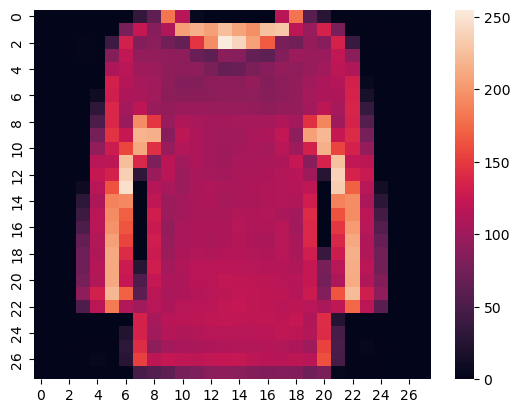

In [7]:
sns.heatmap(X_train[6321])

# Data preparation

Normalization of data

In [8]:
X_test = X_test/255
X_train = X_train/255

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

<Axes: >

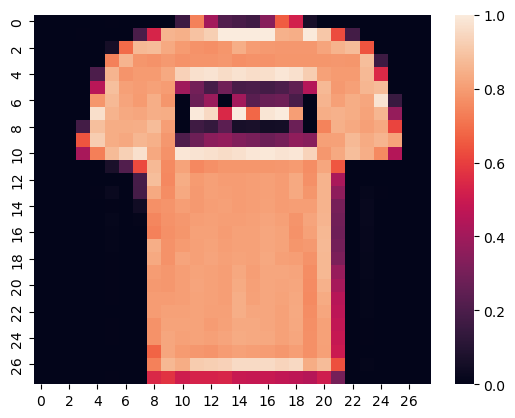

In [10]:
sns.heatmap(X_train[1])

Now we flatten the image, so that in can be inputed to neural network

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train_flat = X_train.reshape(60000,784)
X_test_flat = X_test.reshape(10000,784)

Now we need to one code the label

In [14]:
y_train = pd.get_dummies(y_train)
y_train.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_train.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [15]:
y_test = pd.get_dummies(y_test)
y_test.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_test.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


# Basic neural networks

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,InputLayer, BatchNormalization,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

First model, rectified linear unit as activation function, one dropout layer

In [17]:
model1 = Sequential()
model1.add(InputLayer(784))

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(units=10, activation='softmax'))
model1.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [18]:
model1.fit(X_train_flat, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_train_flat, y_train))

Epoch 1/15
469/469 [==============================] - 8s 12ms/step - loss: 0.5368 - accuracy: 0.8125 - val_loss: 0.4395 - val_accuracy: 0.8423
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3829 - accuracy: 0.8620 - val_loss: 0.3721 - val_accuracy: 0.8613
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3429 - accuracy: 0.8751 - val_loss: 0.3163 - val_accuracy: 0.8828
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3207 - accuracy: 0.8840 - val_loss: 0.3087 - val_accuracy: 0.8869
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2994 - accuracy: 0.8892 - val_loss: 0.3198 - val_accuracy: 0.8787
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2875 - accuracy: 0.8947 - val_loss: 0.2979 - val_accuracy: 0.8862
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2765 - accuracy: 0.8987 - val_loss: 0.2947 - val_accuracy: 0.8889
Epoc

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Making predictions, and converting to categorical values from propability

In [20]:
predictions = model1.predict(X_test_flat)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [21]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       991
           1       0.97      1.00      0.98       977
           2       0.82      0.81      0.81      1017
           3       0.91      0.87      0.89      1044
           4       0.85      0.80      0.82      1059
           5       0.96      0.98      0.97       976
           6       0.58      0.84      0.68       688
           7       0.95      0.94      0.94      1009
           8       0.96      0.99      0.98       973
           9       0.96      0.95      0.96      1017

   micro avg       0.88      0.90      0.89      9751
   macro avg       0.88      0.90      0.89      9751
weighted avg       0.89      0.90      0.89      9751
 samples avg       0.88      0.88      0.88      9751



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Secound model tanh as activation function, one dropout layer

In [22]:
model2 = Sequential()
model2.add(InputLayer(784))

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [24]:
model2.fit(X_train_flat, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_train_flat, y_train))

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.5274 - accuracy: 0.8150 - val_loss: 0.3820 - val_accuracy: 0.8646
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3824 - accuracy: 0.8639 - val_loss: 0.3178 - val_accuracy: 0.8846
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3382 - accuracy: 0.8773 - val_loss: 0.3431 - val_accuracy: 0.8706
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3116 - accuracy: 0.8853 - val_loss: 0.3009 - val_accuracy: 0.8884
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2954 - accuracy: 0.8905 - val_loss: 0.2987 - val_accuracy: 0.8848
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2788 - accuracy: 0.8969 - val_loss: 0.2887 - val_accuracy: 0.8880
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2616 - accuracy: 0.9037 - val_loss: 0.2468 - val_accuracy: 0.9093
Epoch 

In [25]:
predictions = model1.predict(X_test_flat)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [26]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       991
           1       0.97      1.00      0.98       977
           2       0.82      0.81      0.81      1017
           3       0.91      0.87      0.89      1044
           4       0.85      0.80      0.82      1059
           5       0.96      0.98      0.97       976
           6       0.58      0.84      0.68       688
           7       0.95      0.94      0.94      1009
           8       0.96      0.99      0.98       973
           9       0.96      0.95      0.96      1017

   micro avg       0.88      0.90      0.89      9751
   macro avg       0.88      0.90      0.89      9751
weighted avg       0.89      0.90      0.89      9751
 samples avg       0.88      0.88      0.88      9751



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Convolutional Neural Network

In [27]:
from tensorflow.keras.callbacks import TensorBoard

In [28]:
arch = 'CNN_1'
tb = TensorBoard(log_dir='logs/' + arch)

Reshaping data to fit CNN

In [29]:
X_test.shape

(10000, 28, 28)

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [32]:
X_train[0].shape

(28, 28, 1)

First CNN with 3 convolutional layers, increasing the number of filters, with padding, becouse data does touch the edges 

In [33]:

model3 = Sequential()

model3.add(InputLayer((28,28,1)))

model3.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model3.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model3.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model3.add(MaxPooling2D(pool_size=(3, 3)))


model3.add(Flatten()) 

model3.add(Dense(128,activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [34]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)              

In [35]:
model3.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test))

Epoch 1/15
469/469 [==============================] - 10s 9ms/step - loss: 0.4741 - accuracy: 0.8339 - val_loss: 0.4063 - val_accuracy: 0.8558
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3155 - accuracy: 0.8882 - val_loss: 0.3547 - val_accuracy: 0.8735
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2631 - accuracy: 0.9048 - val_loss: 0.3018 - val_accuracy: 0.8899
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2299 - accuracy: 0.9168 - val_loss: 0.2924 - val_accuracy: 0.8931
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2014 - accuracy: 0.9268 - val_loss: 0.2801 - val_accuracy: 0.9038
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1789 - accuracy: 0.9346 - val_loss: 0.3170 - val_accuracy: 0.8950
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1576 - accuracy: 0.9434 - val_loss: 0.3123 - val_accuracy: 0.8988
Epoch

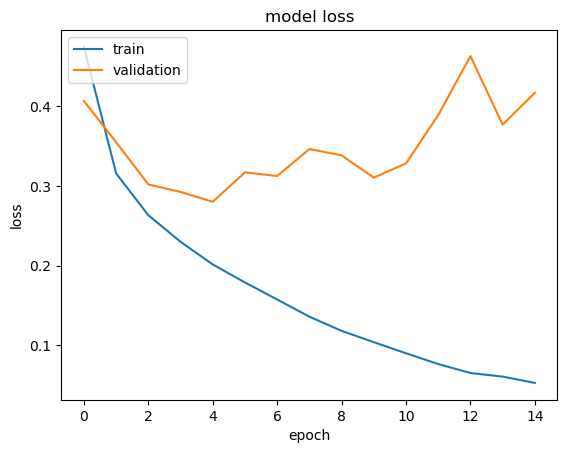

In [36]:
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Since the model is overtraning I'll add dropout to convolutional layers

In [37]:
model4 = Sequential()

model4.add(InputLayer((28,28,1)))

model4.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model4.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model4.add(Dropout(0.4))

model4.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model4.add(Dropout(0.4))
model4.add(MaxPooling2D(pool_size=(3, 3)))


model4.add(Flatten()) 

model4.add(Dense(128,activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(units=10, activation='softmax'))
model4.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [38]:
model4.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 6s 10ms/step - loss: 0.6536 - accuracy: 0.7689 - val_loss: 0.5687 - val_accuracy: 0.8299
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4359 - accuracy: 0.8449 - val_loss: 0.3729 - val_accuracy: 0.8689
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3772 - accuracy: 0.8657 - val_loss: 0.3303 - val_accuracy: 0.8778
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3449 - accuracy: 0.8771 - val_loss: 0.3326 - val_accuracy: 0.8754
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3219 - accuracy: 0.8850 - val_loss: 0.3178 - val_accuracy: 0.8858
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3057 - accuracy: 0.8903 - val_loss: 0.2856 - val_accuracy: 0.8949
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2941 - accuracy: 0.8938 - val_loss: 0.2826 - val_accuracy: 0.8969
Epoch

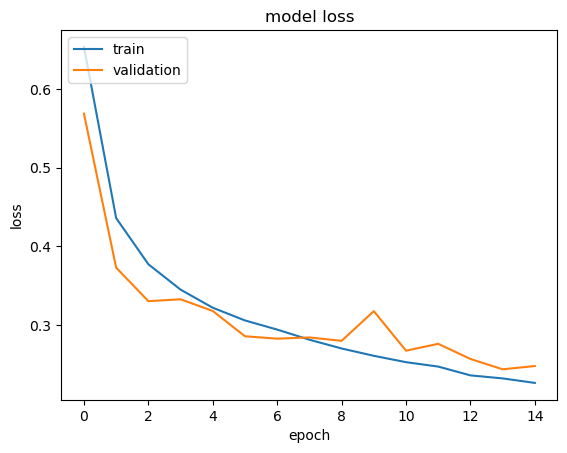

In [39]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Second CNN with 3 convolutional and 2 deep layers 

In [40]:
arch = 'CNN_2'
tb = TensorBoard(log_dir='logs/' + arch)

In [41]:
model5 = Sequential()

model5.add(InputLayer((28,28,1)))

model5.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model5.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model5.add(Dropout(0.4))

model5.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model5.add(Dropout(0.4))
model5.add(MaxPooling2D(pool_size=(3, 3)))


model5.add(Flatten()) 

model5.add(Dense(128,activation = "relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))


model5.add(Dense(128,activation = "relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))

model5.add(Dense(units=10, activation='softmax'))
model5.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [42]:
model5.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 7s 13ms/step - loss: 0.8982 - accuracy: 0.6865 - val_loss: 0.5591 - val_accuracy: 0.8006
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.5153 - accuracy: 0.8148 - val_loss: 0.4198 - val_accuracy: 0.8432
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.4368 - accuracy: 0.8433 - val_loss: 0.4134 - val_accuracy: 0.8415
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3920 - accuracy: 0.8611 - val_loss: 0.3270 - val_accuracy: 0.8804
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3627 - accuracy: 0.8719 - val_loss: 0.3126 - val_accuracy: 0.8838
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3440 - accuracy: 0.8789 - val_loss: 0.3098 - val_accuracy: 0.8859
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3220 - accuracy: 0.8848 - val_loss: 0.2875 - val_accuracy: 0.8928

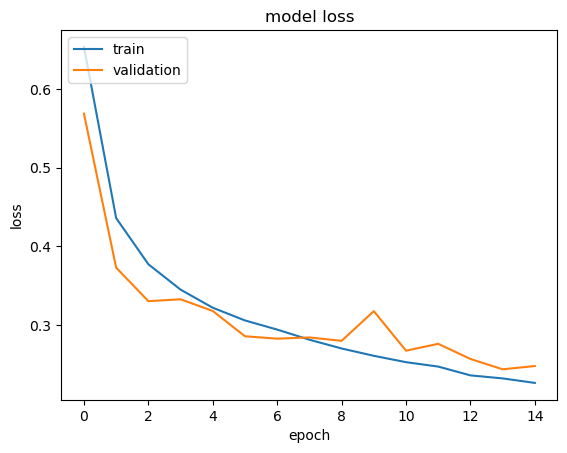

In [43]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Third CNN with 4 convolutional and 1 deep layer 

In [44]:
arch = 'CNN_3'
tb = TensorBoard(log_dir='logs/' + arch)

In [45]:
model6 = Sequential()

model6.add(InputLayer((28,28,1)))

model6.add(Conv2D(32, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model6.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model6.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model6.add(Dropout(0.4))

model6.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model6.add(Dropout(0.4))
model6.add(MaxPooling2D(pool_size=(2, 2)))


model6.add(Flatten()) 

model6.add(Dense(128,activation = "relu"))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))

model6.add(Dense(units=10, activation='softmax'))
model6.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [46]:
model6.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.6065 - accuracy: 0.7818 - val_loss: 0.4759 - val_accuracy: 0.8563
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3938 - accuracy: 0.8595 - val_loss: 0.3328 - val_accuracy: 0.8772
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3389 - accuracy: 0.8783 - val_loss: 0.3072 - val_accuracy: 0.8874
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3092 - accuracy: 0.8886 - val_loss: 0.2942 - val_accuracy: 0.8926
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2805 - accuracy: 0.8989 - val_loss: 0.2768 - val_accuracy: 0.8979
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2652 - accuracy: 0.9046 - val_loss: 0.2656 - val_accuracy: 0.9039
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2501 - accuracy: 0.9101 - val_loss: 0.2750 - val_accuracy: 0.8982
Epoch

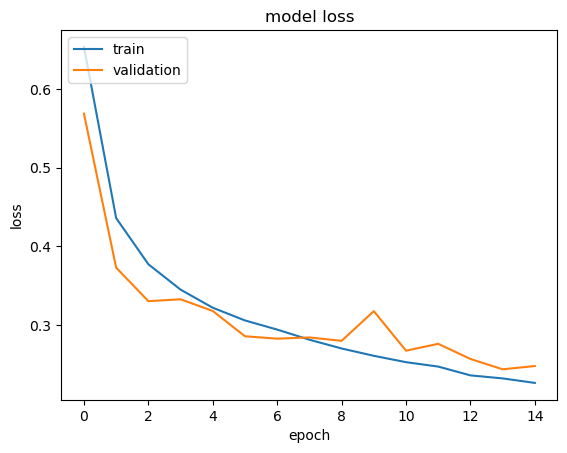

In [47]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# Model evaluation

In [48]:
%load_ext tensorboard
%tensorboard --logdir logs --host localhost

Reusing TensorBoard on port 6006 (pid 15412), started 1:17:04 ago. (Use '!kill 15412' to kill it.)

In tensorboard we see that third CNN which is 6th model performs the best, will test it further

In [49]:
predictions = model6.predict(X_test)

In [50]:
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [51]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       977
           1       0.98      0.99      0.99       985
           2       0.84      0.92      0.88       919
           3       0.95      0.89      0.92      1060
           4       0.84      0.90      0.87       938
           5       0.98      0.99      0.98       991
           6       0.73      0.80      0.76       910
           7       0.98      0.95      0.97      1028
           8       0.98      0.99      0.98       988
           9       0.96      0.98      0.97       981

   micro avg       0.91      0.93      0.92      9777
   macro avg       0.91      0.93      0.92      9777
weighted avg       0.91      0.93      0.92      9777
 samples avg       0.91      0.91      0.91      9777



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(confusion_matrix(predictions.argmax(axis=1),np.array(y_test).argmax(axis=1)))

[[898   5  62  28  38   2 151   0  16   0]
 [  0 980   1   0   1   0   3   0   0   0]
 [  4   0 845   5  32   0  33   0   0   0]
 [ 18  12   8 948  41   0  30   0   3   0]
 [  1   1  36   8 843   0  49   0   0   0]
 [  1   0   0   0   0 977   0   6   1   6]
 [ 75   0  48  10  45   0 730   0   1   1]
 [  0   0   0   0   0  14   0 980   1  33]
 [  3   2   0   1   0   0   4   0 978   0]
 [  0   0   0   0   0   7   0  14   0 960]]


It seems that our model has problem with classfing some of the numbers, lets make a list of those

In [53]:
obj_list = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]

In [54]:
false_predictions = [i for i in range(len(predictions.argmax(axis=1)))
                     if predictions.argmax(axis=1)[i] != np.array(y_test).argmax(axis=1)[i]]

In [55]:
X_test = X_test.reshape(10000, 28, 28)

True value :  Sneaker
Predicted value :  Sandal


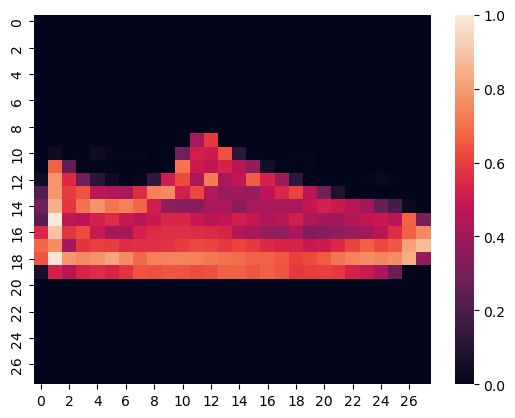

True value :  Ankle_boot
Predicted value :  Sandal


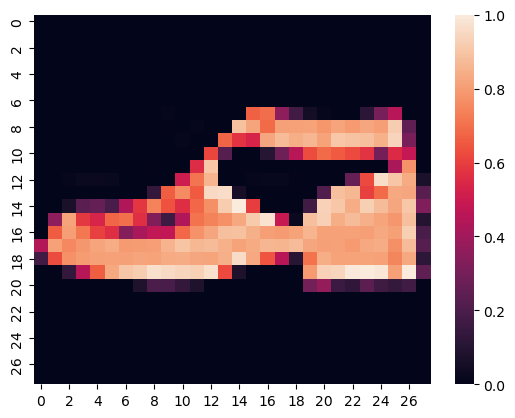

True value :  Coat
Predicted value :  Shirt


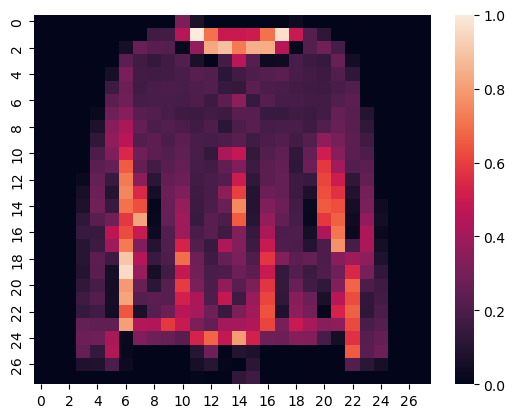

True value :  Shirt
Predicted value :  T-shirt/top


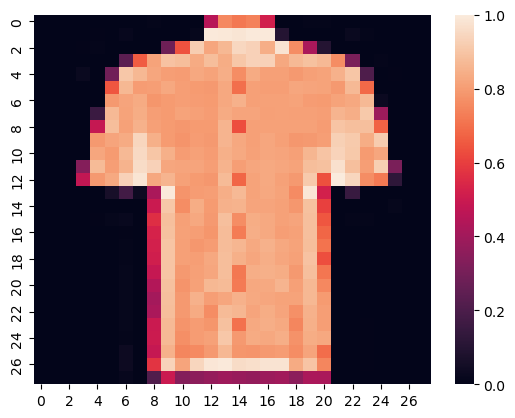

True value :  Dress
Predicted value :  T-shirt/top


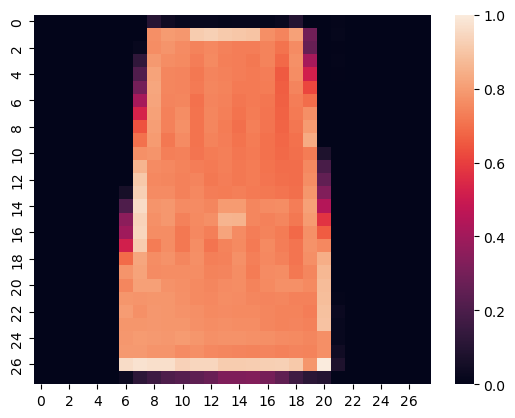

True value :  Pullover
Predicted value :  Shirt


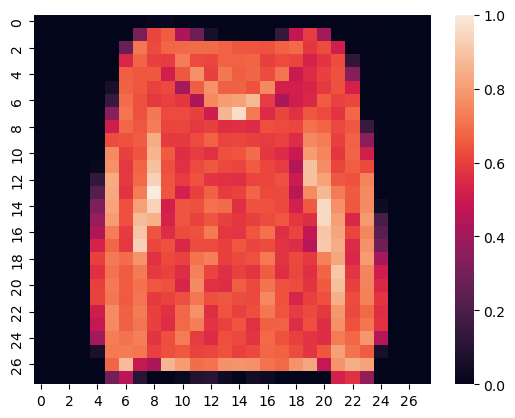

True value :  Pullover
Predicted value :  T-shirt/top


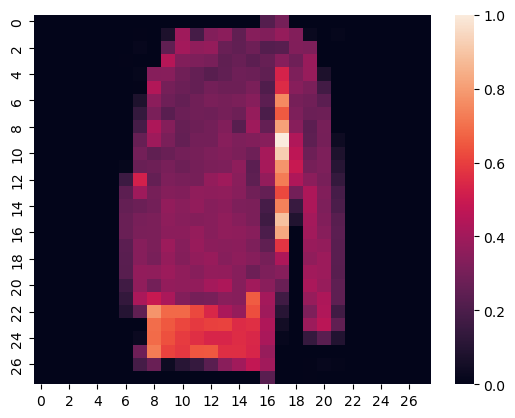

True value :  Ankle_boot
Predicted value :  Sneaker


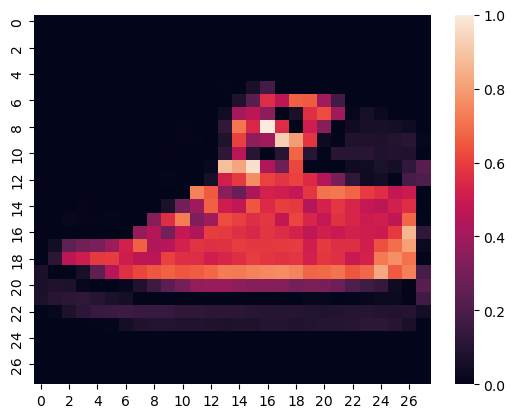

True value :  Coat
Predicted value :  T-shirt/top


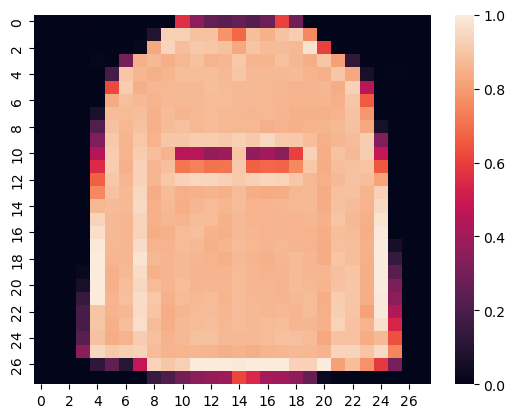

True value :  Pullover
Predicted value :  Shirt


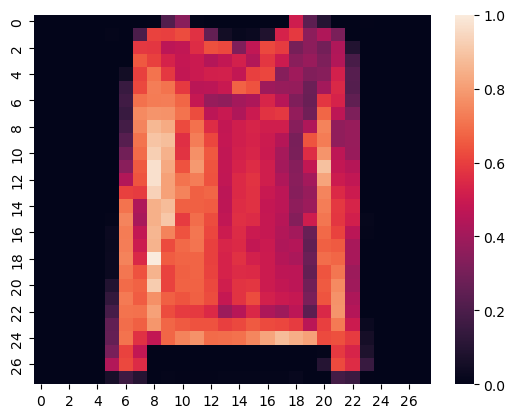

In [56]:
for i in range(0,10):
    j = false_predictions[i]
    sns.heatmap(X_test[j])
    print("True value : ",obj_list[np.array(y_test).argmax(axis=1)[j]])
    print("Predicted value : ",obj_list[predictions.argmax(axis=1)[j]])
    plt.show()

It seems that wrong predictions happend on images that would be hard to classify correctly even for human, which explains why the network couldn't get higher accuracy then around 92%